# Demo

In [20]:
# Common imports
import matplotlib.pyplot as plt
import numpy as np
import os
import rdata
from sklearn.decomposition import PCA
import scipy as sp
import sys

path = '/Users/israfelsalazar/Documents/lfmm-python.nosync/lfmm-python'
sys.path.append(path)

# Local imports
from lfmm import lfmm_ridge, lfmm_test

%load_ext autoreload
%autoreload 2

## Reading the data

In [17]:
# Reading the data
parsed = rdata.parser.parse_file("../data/example.data.rda")
converted = rdata.conversion.convert(parsed)
example_data = converted['example.data']
del converted

We can reveal some structure in the genotypic data using a PCA. For this we use the PCA implementation of Sklearn.

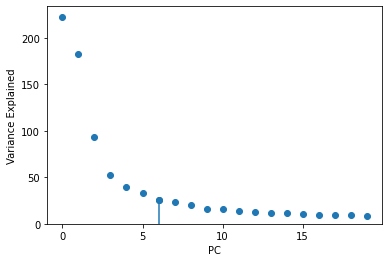

In [18]:
Y = example_data["genotype"]
pca = PCA()
pca.fit(Y)

plt.figure()
plt.plot(np.power(pca.explained_variance_ratio_[0:20],2)*1e5, 'o',)
plt.xticks(range(0,20,5))
plt.stem([6],[(pca.explained_variance_ratio_[6]**2)*1e5],
         use_line_collection=True)
plt.ylim(0)
plt.xlabel('PC')
plt.ylabel('Variance Explained')
plt.show()

For this data we can see that there are K=6 principal components. To compute the latent factors we will use the same K=6.

## Lfmm Ridge 
The R package contains two main functions for estimating the parameters of LFMMs: **ridge_lfmm** and **lasso_lfmm**. For the moment this reimplementation only supports the **ridge_lfmm**.

In [24]:
Y = example_data["genotype"]
X = example_data["phenotype"]
k = 6

## Fit an LFMM, i.e, compute B, U, V estimates
lfmm = lfmm_ridge(Y, X, k)

The **ridge_lfmm** function returns an object that contains the latent variable score matrix U, the latent variable loading matrix V, and B the effect sizes for all SNPs. The result can be used to perform an association study:

In [27]:
pv = lfmm_test(Y = Y, 
               X = X, 
               lfmm = lfmm, 
               calibrate = "gif")
pvalues = pv['pvalue']

/Users/israfelsalazar/Documents/lfmm-python.nosync/lfmm-python/hypothesis_testing.py:19: RuntimeWarning: invalid value encountered in true_divide
  hp['score'] = hp['B'] / np.sqrt(hp['B_sigma2'])


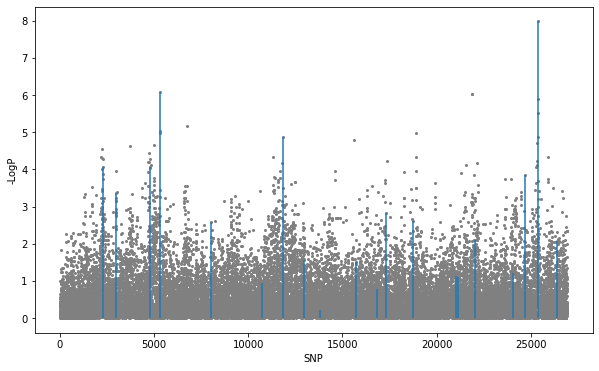

In [30]:
plt.figure(figsize=(10,6))
plt.plot(-np.log10(pvalues), 'o', color='grey', markersize=2, zorder=1)
plt.stem(example_data['causal.set'],
         -np.log10(pvalues[example_data['causal.set']-1]),
         markerfmt=' ', use_line_collection=True, basefmt=' ')
plt.xlabel('SNP')
plt.ylabel('-LogP')
plt.show()